<a href="https://colab.research.google.com/github/julianovale/lean_6_sigma_python/blob/master/0008_dispersao_correlacao_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scatterplots (Diagrama de dispersão), Correlação e Regressão
## Scatterplots

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

In [3]:
Sales = pd.read_excel("https://github.com/julianovale/lean_6_sigma_python/blob/master/Regression.xlsx?raw=true")

In [4]:
Sales.head()

,Sales,Enquires,LaborDeployed,AvgResponseTime,NoofStockOuts
0,20.6,5193,48,96.325071,2
1,12.4,4995,37,193.276852,8
2,18.6,5229,48,162.271452,4
3,19.8,5222,47,132.756201,4
4,7.5,4614,21,153.479144,8


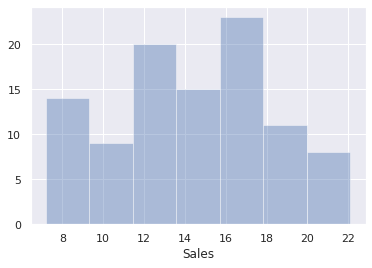

In [5]:
sns.distplot(Sales.Sales, kde=False)

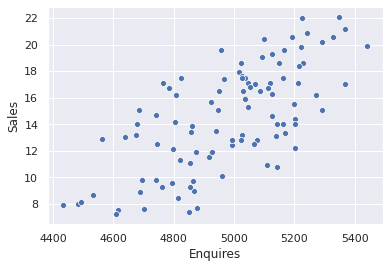

In [6]:
sns.scatterplot(y=Sales.Sales, x=Sales.Enquires)

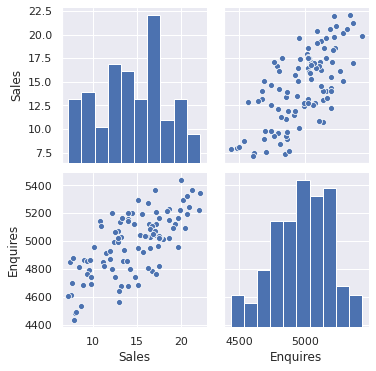

In [7]:
sns.pairplot(Sales, vars = ['Sales', 'Enquires'])

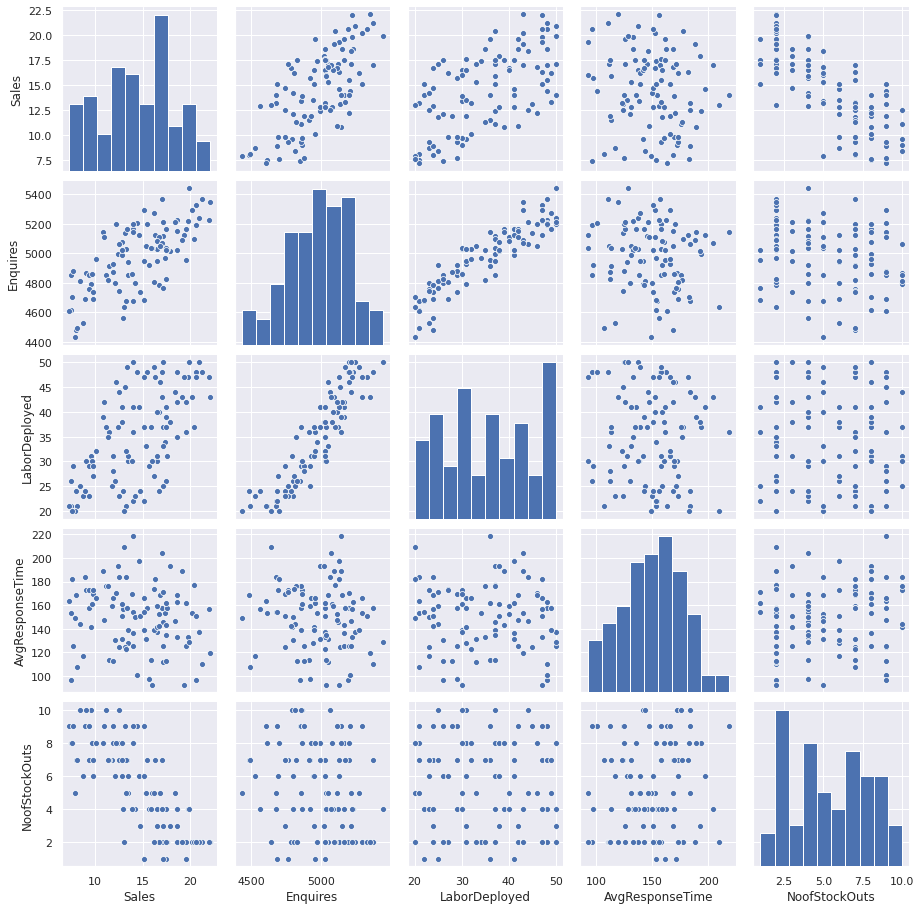

In [8]:
sns.pairplot(Sales, vars = ['Sales', 'Enquires', 'LaborDeployed', 'AvgResponseTime', 'NoofStockOuts'])

## Coeficiente de correlação

In [9]:
cor = Sales.corr(method='pearson')

In [10]:
cor

,Sales,Enquires,LaborDeployed,AvgResponseTime,NoofStockOuts
Sales,1.000000,0.693551,0.609308,-0.146156,-0.777959
Enquires,0.693551,1.000000,0.910704,-0.125756,-0.176915
LaborDeployed,0.609308,0.910704,1.000000,-0.077711,-0.110578
AvgResponseTime,-0.146156,-0.125756,-0.077711,1.000000,0.115509
NoofStockOuts,-0.777959,-0.176915,-0.110578,0.115509,1.000000


### Análise:
- Sugerido pelo instrutor: qualquer coisa entre 0,6 e 0,8 é considerado com uma correlação moderada e a partir de 0,8 considera-se uma correlação forte. Em qualquer dos sentidos, claro: positivo ou negativo.

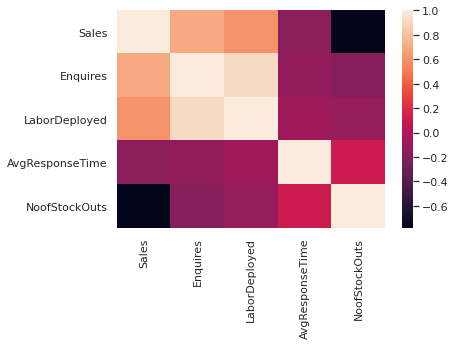

In [11]:
sns.heatmap(cor)

## Fazendo a regressão
- Variáveis correlacionadas com Sales: Enquires, LaborDeployed, NoofStockOuts

In [12]:
import statsmodels.api as sm

In [13]:
inputs = ['Enquires', 'LaborDeployed', 'NoofStockOuts']
x = Sales[inputs]
x

,Enquires,LaborDeployed,NoofStockOuts
0,5193,48,2
1,4995,37,8
2,5229,48,4
3,5222,47,4
4,4614,21,8
...,...,...,...
95,4694,27,6
96,5442,50,4
97,4825,26,2
98,5110,42,9


In [14]:
y = Sales['Sales']
y

0     20.6
1     12.4
2     18.6
3     19.8
4      7.5
      ... 
95     9.8
96    19.9
97    17.5
98    10.9
99    17.1
Name: Sales, Length: 100, dtype: float64

In [15]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              5058.
Date:                Tue, 30 Jun 2020   Prob (F-statistic):                   2.18e-106
Time:                        13:22:56   Log-Likelihood:                         -159.54
No. Observations:                 100   AIC:                                      325.1
Df Residuals:                      97   BIC:                                      332.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Enquires          0.0029      0.000     22.242      0.000       0.003       0.003
LaborDeployed     0.1554      0.016      9.871      0.000       0.124       0.187
NoofStockOuts    -1.0339      0.045    -22.978      0.000      -1.123      -0.945
==============================================================================
Omnibus:                        1.568   Durbin-Watson:                   2.256
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                1.625
Skew:                          -0.263   Prob(JB):                        0.444
Kurtosis:                       2.663   Cond. No.                     1.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
x=sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     395.2
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           7.21e-54
Time:                        13:22:56   Log-Likelihood:                -147.93
No. Observations:                 100   AIC:                             303.9
Df Residuals:                      96   BIC:                             314.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -26.0446      5.199     -5.009      0.000     -36.366     -15.724
Enquires          0.0090      0.001      7.394      0.000       0.007       0.011
LaborDeployed     0.0298      0.029      1.037      0.302      -0.027       0.087
NoofStockOuts    -0.9852      0.041    -23.777      0.000      -1.067      -0.903
==============================================================================
Omnibus:                        1.090   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.580   Jarque-Bera (JB):                1.182
Skew:                          -0.204   Prob(JB):                        0.554
Kurtosis:                       2.657   Cond. No.                     2.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
inputs = ['Enquires','NoofStockOuts']
x = Sales[inputs]

In [18]:
x=sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     591.8
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           4.46e-55
Time:                        13:22:56   Log-Likelihood:                -148.48
No. Observations:                 100   AIC:                             303.0
Df Residuals:                      97   BIC:                             310.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -30.7459      2.549    -12.064      0.000     -35.804     -25.688
Enquires          0.0101      0.001     20.212      0.000       0.009       0.011
NoofStockOuts    -0.9798      0.041    -23.824      0.000      -1.061      -0.898
==============================================================================
Omnibus:                        0.765   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.890
Skew:                          -0.169   Prob(JB):                        0.641
Kurtosis:                       2.685   Cond. No.                     1.17e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Equação
- Sales = - 30.7459 + 0,0101 * Enquires - 0.9798 * NoofStocksOuts

Na segunda etapa, após a inclusão da constante (intercepto), a variável LabelDeployed apresentou valor-p muito alto, acima de 0.05, a saber 0.302, assim, foi excluída do modelo.